In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
os.getcwd()

'C:\\Users\\neroc\\Data Analysis\\kaggle\\datasets\\bicycle'

In [9]:
import os
os.chdir("C:/Users/neroc/Data Analysis/kaggle/datasets/bicycle")

In [10]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [11]:
# train.columns
# train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [12]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [13]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [14]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [15]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5,0,'hour'), Text(0.5,1,'Count by hour')]

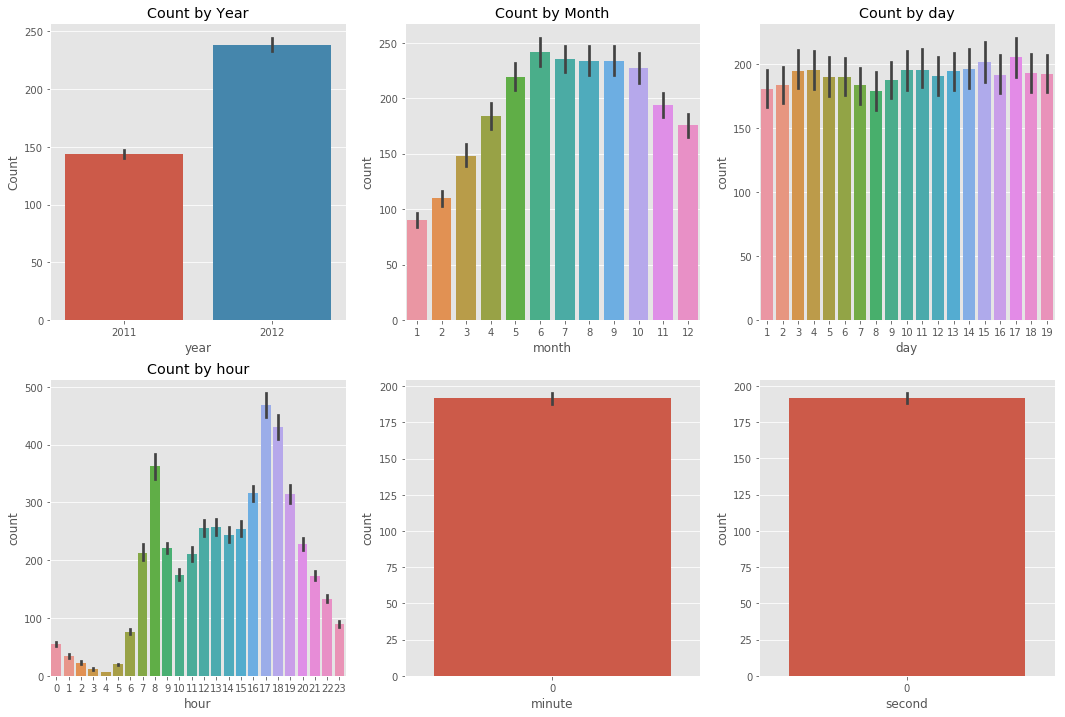

In [17]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="Count by Year")
ax2.set(xlabel='month',title="Count by Month")
ax3.set(xlabel='day', title="Count by day")
ax4.set(xlabel='hour', title="Count by hour")

[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Count whethere Working Day')]

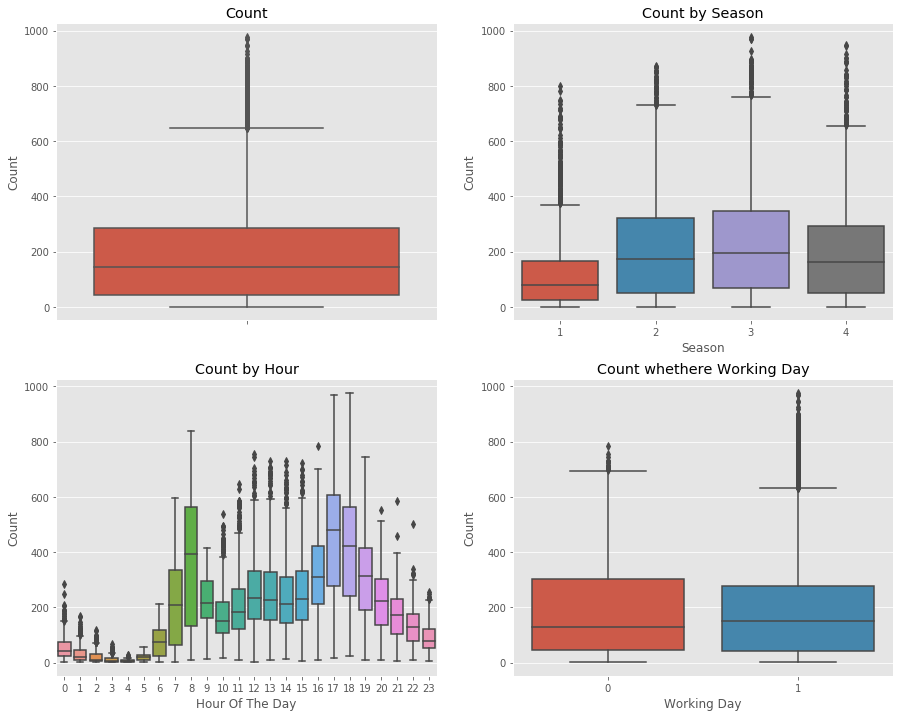

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 12)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Count by Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Count by Hour")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Count whether Working Day")

In [19]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [20]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

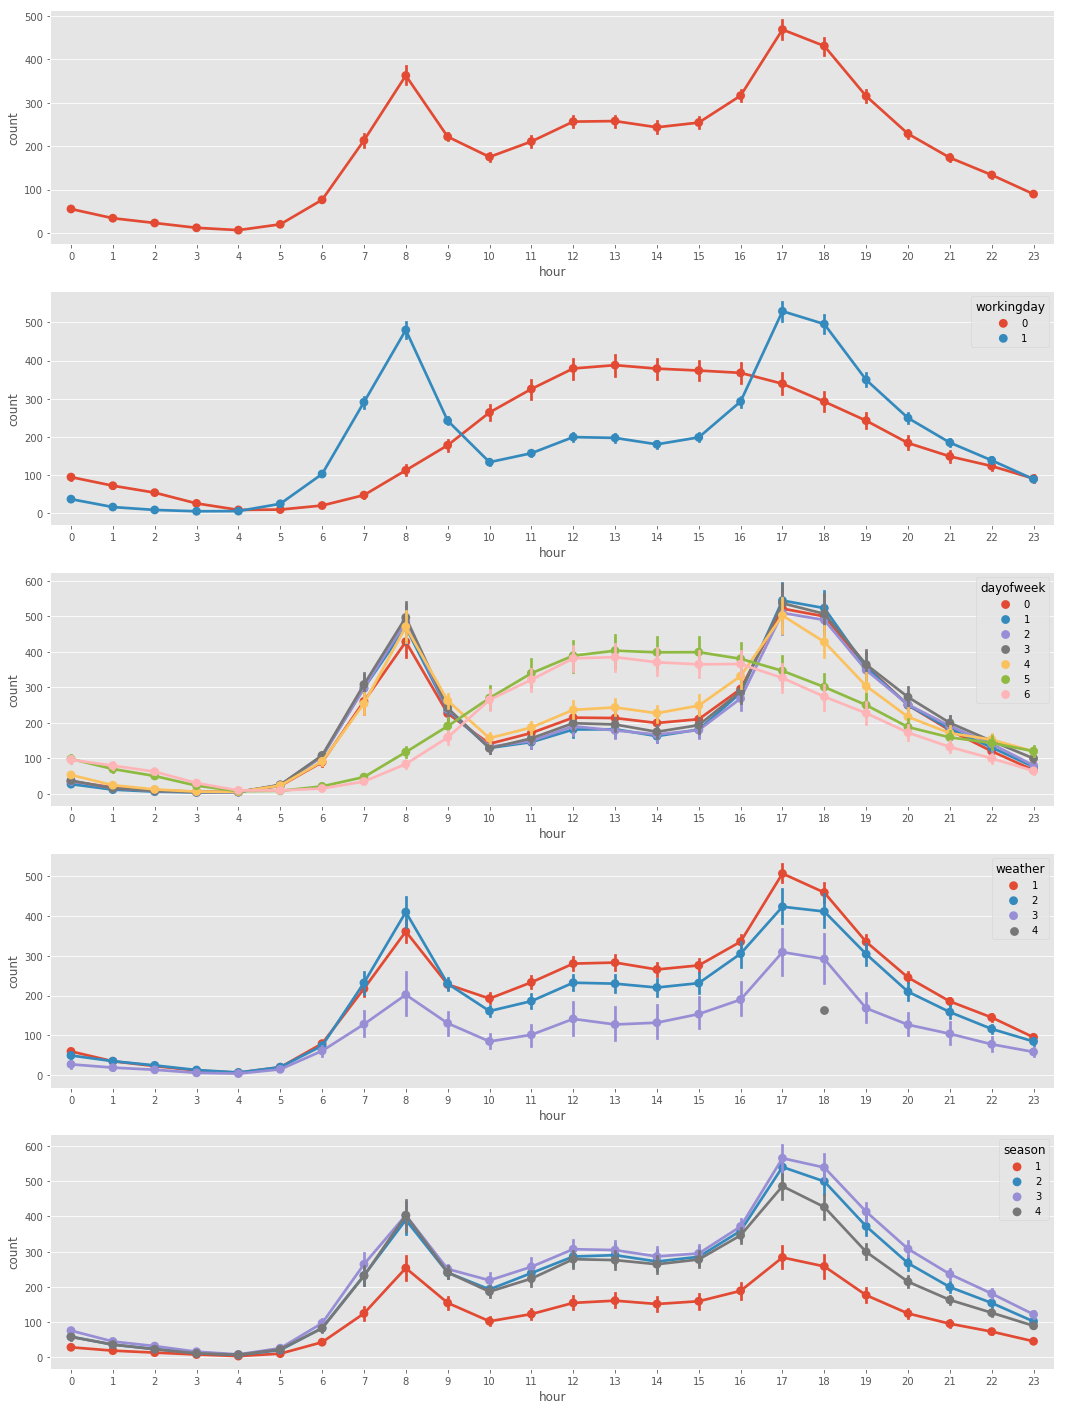

In [21]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [22]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


In [23]:
np.array(corrMatt)

array([[ 1.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.98494811,  1.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.46709706,  0.46206654,  1.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.31857128,  0.31463539,  0.49724969,  1.        , -0.26545787,
         0.09105166,  0.97094811],
       [-0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
        -0.31860699, -0.31737148],
       [-0.01785201, -0.057473  ,  0.09227619,  0.09105166, -0.31860699,
         1.        ,  0.10136947],
       [ 0.39445364,  0.38978444,  0.69041357,  0.97094811, -0.31737148,
         0.10136947,  1.        ]])

In [24]:
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [25]:
corrMatt

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


In [26]:
np.array(corrMatt)

array([[ 1.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.98494811,  1.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.46709706,  0.46206654,  1.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.31857128,  0.31463539,  0.49724969,  1.        , -0.26545787,
         0.09105166,  0.97094811],
       [-0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
        -0.31860699, -0.31737148],
       [-0.01785201, -0.057473  ,  0.09227619,  0.09105166, -0.31860699,
         1.        ,  0.10136947],
       [ 0.39445364,  0.38978444,  0.69041357,  0.97094811, -0.31737148,
         0.10136947,  1.        ]])

In [27]:
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [28]:
pd.DataFrame(mask)

,0,1,2,3,4,5,6
0,0.0,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
1,0.0,0.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
2,0.0,0.000000,0.000000,0.497250,-0.348187,0.092276,0.690414
3,0.0,0.000000,0.000000,0.000000,-0.265458,0.091052,0.970948
4,0.0,0.000000,0.000000,0.000000,0.000000,-0.318607,-0.317371
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.101369
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


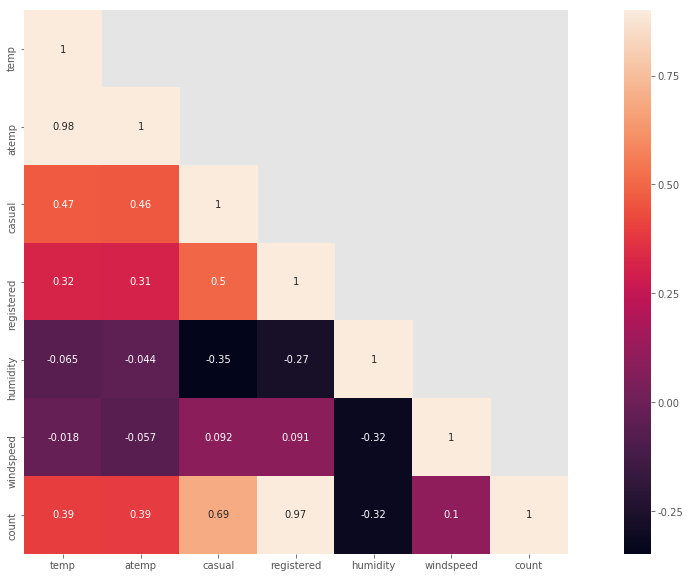

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.9, square=True,annot=True) #square : 정사각형으로 , annot : 사각형 안에 숫자표시

In [35]:
sns.heatmap?

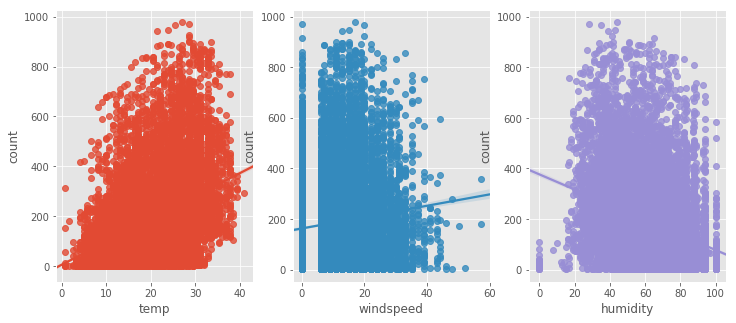

In [36]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

In [38]:
train.temp

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
5         9.84
6         9.02
7         8.20
8         9.84
9        13.12
10       15.58
11       14.76
12       17.22
13       18.86
14       18.86
15       18.04
16       17.22
17       18.04
18       17.22
19       17.22
20       16.40
21       16.40
22       16.40
23       18.86
24       18.86
25       18.04
26       17.22
27       18.86
28       18.86
29       17.22
         ...  
10856    15.58
10857    15.58
10858    14.76
10859    14.76
10860    13.94
10861    13.94
10862    12.30
10863    12.30
10864    11.48
10865    10.66
10866     9.84
10867    10.66
10868     9.84
10869    10.66
10870     9.84
10871    11.48
10872    13.12
10873    16.40
10874    16.40
10875    17.22
10876    17.22
10877    17.22
10878    17.22
10879    16.40
10880    15.58
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

In [48]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [45]:
("{0}-{1}".format(train.datetime.dt.year, train.datetime.dt.month))

'0        2011\n1        2011\n2        2011\n3        2011\n4        2011\n5        2011\n6        2011\n7        2011\n8        2011\n9        2011\n10       2011\n11       2011\n12       2011\n13       2011\n14       2011\n15       2011\n16       2011\n17       2011\n18       2011\n19       2011\n20       2011\n21       2011\n22       2011\n23       2011\n24       2011\n25       2011\n26       2011\n27       2011\n28       2011\n29       2011\n         ... \n10856    2012\n10857    2012\n10858    2012\n10859    2012\n10860    2012\n10861    2012\n10862    2012\n10863    2012\n10864    2012\n10865    2012\n10866    2012\n10867    2012\n10868    2012\n10869    2012\n10870    2012\n10871    2012\n10872    2012\n10873    2012\n10874    2012\n10875    2012\n10876    2012\n10877    2012\n10878    2012\n10879    2012\n10880    2012\n10881    2012\n10882    2012\n10883    2012\n10884    2012\n10885    2012\nName: datetime, Length: 10886, dtype: int64-0         1\n1         1\n2         1\n3

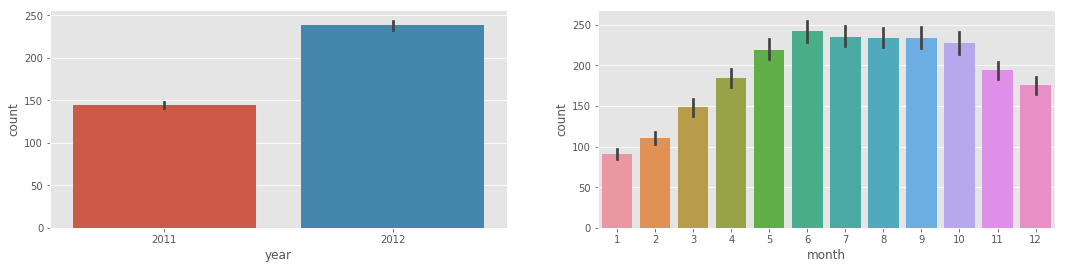

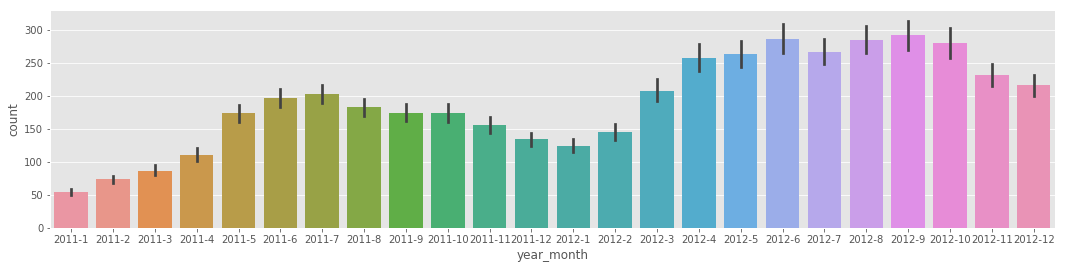

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

In [50]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


C:\Users\neroc\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([ 1.        ,  1.        ,  1.        , ..., 27.05549852,
         27.07397274, 27.09243437])),
 (6.3841178877202225, 11.880366080979938, 0.9863972257133206))

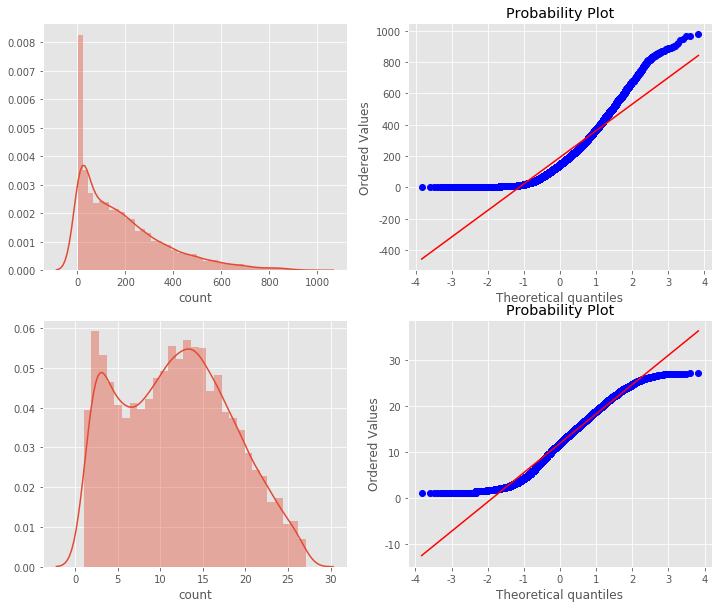

In [74]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=False, plot=axes[0][1])
sns.distplot((trainWithoutOutliers["count"])**0.5, ax=axes[1][0])
stats.probplot((trainWithoutOutliers["count"])**0.5, dist='norm', fit=True, plot=axes[1][1])

In [54]:
stats.probplot?

In [60]:
np.mean(train["count"])

191.57413191254824

C:\Users\neroc\Anaconda3\envs\DataAnalysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

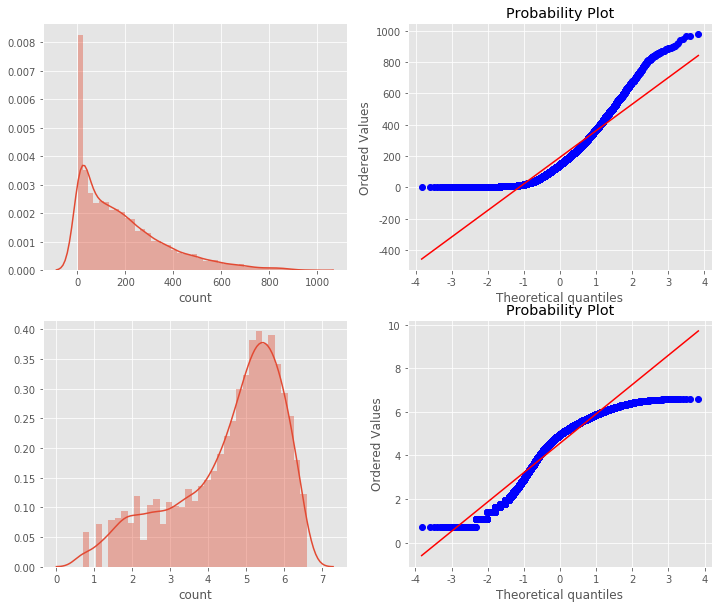

In [76]:

# count값의 데이터 분포도를 파악# count값 

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

In [78]:
sns.distplot?